# Step 1: Install the Necessary Libraries

In [6]:
# pip install -r requirements.txt

# Step 2: Import the Country Relationships CSV File

In [7]:
# Step 2: Import libraries and load the DataFrame
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Load the CSV file into a DataFrame
relationships_df = pd.read_csv('country_relationships.csv')

# Display the first few rows to confirm successful import
relationships_df.head()

,Country1,Country2,Relationship_Type,Strength,Year_Established
0,Nigeria,China,rival,1,1921
1,Indonesia,Egypt,rival,7,1966
2,Russia,Spain,ally,9,1991
3,India,Japan,rival,4,1953
4,Indonesia,South Africa,neutral,1,1950


# Step 3: Create a Network Object from the DataFrame
Convert the DataFrame into a NetworkX graph.

In [9]:
import networkx as nx
print(nx.__version__)

3.4.2


In [10]:
!pip install networkx==2.8

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 509.0 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/2.0 MB 509.0 kB/s eta 0:00:03
   --------------- ------------------------ 0.8/2.0 MB 550.1 kB/s eta 0:00:03
   --------------- ------------------------ 0.8/2.0 MB 550.1 kB/s eta 0:00:03
   --------------- ------------------------ 0.8/2.0 MB 550.1 kB/s eta 0:00:03
   --------------- ------------------------ 0.8/2.0 MB 550.1 kB/s eta 0:00:03
   --------------- ------------------------ 0.8/2.0 MB 550.1 kB/s eta 0:00:03
   --------------- ---------------------

In [11]:
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph has 25 nodes and 151 edges.


In [12]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Graph information:\nNumber of nodes: {num_nodes}\nNumber of edges: {num_edges}")

Graph information:
Number of nodes: 25
Number of edges: 151


In [14]:
# Step 3: Create a NetworkX graph object
G = nx.Graph()

# Add edges to the graph from the DataFrame
for index, row in relationships_df.iterrows():
    G.add_edge(row['Country1'], row['Country2'])

# Step 4: Create a Static Network Graph Using NetworkX

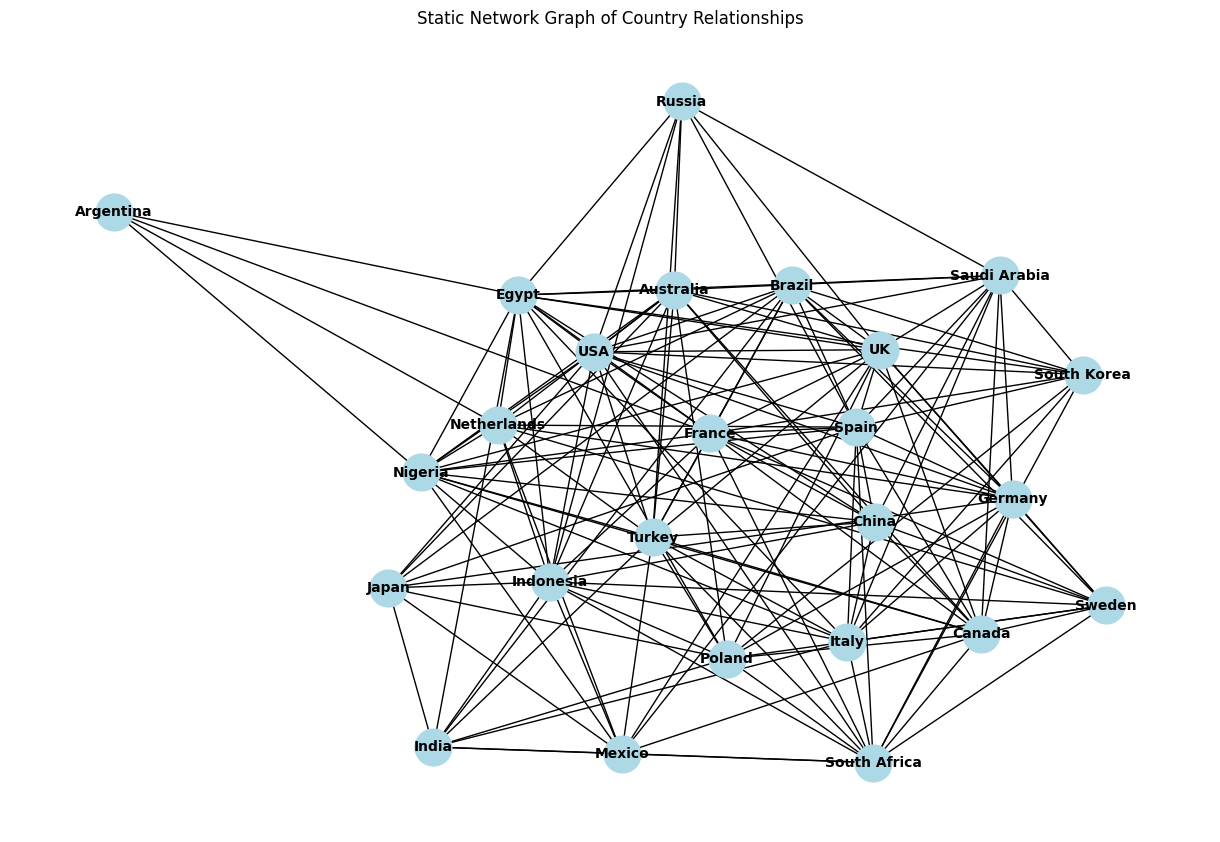

In [15]:
# Step 4: Visualize the static network graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Static Network Graph of Country Relationships")
plt.show()

# Step 5: Create an Interactive Network Graph Using PyVis

In [19]:
!pip install --upgrade pyvis


In [20]:
net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")
net.from_nx(G)
net.show('interactive_country_network.html', notebook=True)

interactive_country_network.html


# Step 6: Apply the Leiden Algorithm for Community Detection

In [21]:
!pip install python-igraph leidenalg


# Apply the Leiden algorithm:

In [22]:
# Step 6: Apply the Leiden algorithm for community detection
import igraph as ig
import leidenalg

# Convert NetworkX graph to iGraph
igraph_g = ig.Graph.TupleList(G.edges(), directed=False)

# Apply Leiden algorithm for community detection
partition = leidenalg.find_partition(igraph_g, leidenalg.ModularityVertexPartition)

# Print partition information
print("Detected Communities:")
for i, community in enumerate(partition):
    print(f"Community {i}: {', '.join([igraph_g.vs[node]['name'] for node in community])}")

Detected Communities:
Community 0: Nigeria, China, Argentina, Spain, Netherlands, France, Canada, Sweden, Germany, Brazil
Community 1: Italy, Mexico, Indonesia, Turkey, South Africa, Poland, India, Japan
Community 2: USA, Australia, UK, Egypt, Saudi Arabia, Russia, South Korea


# Step 7: Visualize Communities and Save as HTML

In [23]:
# Step 7: Visualize communities with PyVis
community_net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")

# Add nodes with colors for communities
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
for i, community in enumerate(partition):
    for node in community:
        community_net.add_node(igraph_g.vs[node]['name'], color=colors[i % len(colors)])

# Add edges
for edge in G.edges():
    community_net.add_edge(edge[0], edge[1])

# Save the community graph as an HTML file
community_net.show('community_network.html')

community_network.html


# Observations on Community Detection
The partition generated by the Leiden algorithm reveals distinct communities within the network.
The detected communities might align with historical, cultural, or economic relationships.

# Step 8: Calculate and Visualize Centrality Measures

# Calculate degree, closeness, and betweenness centrality:

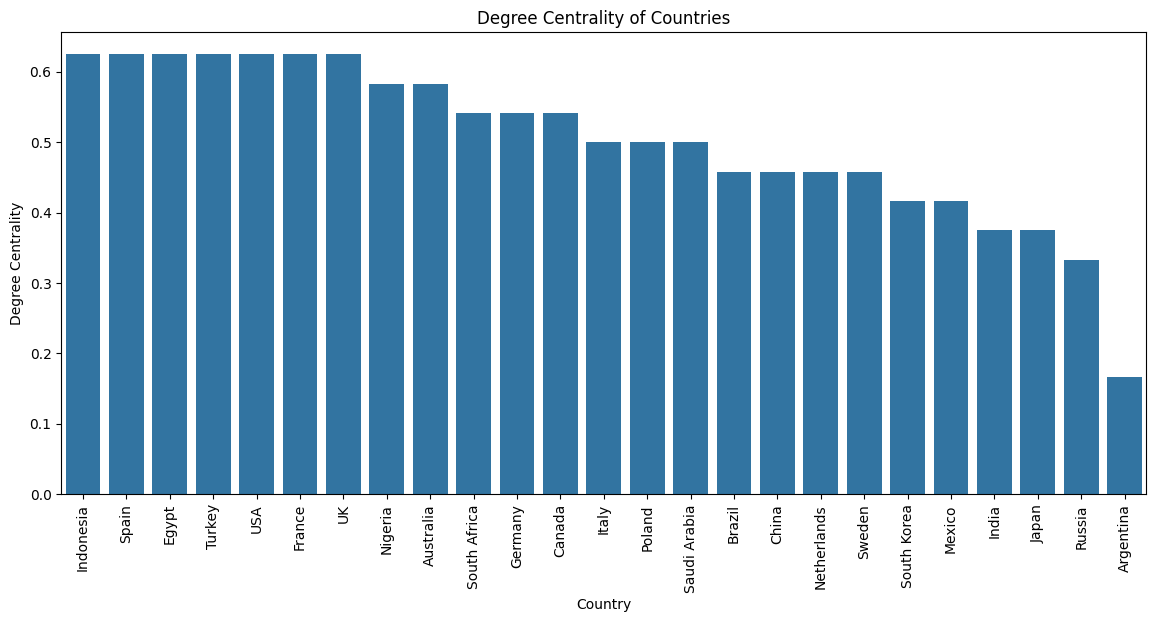

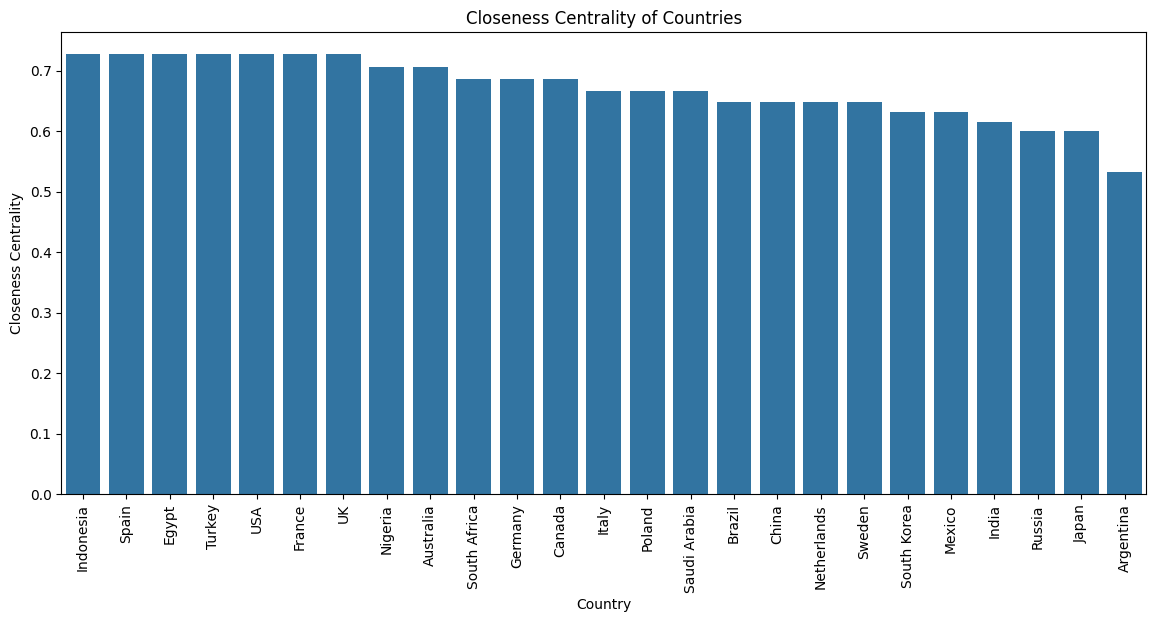

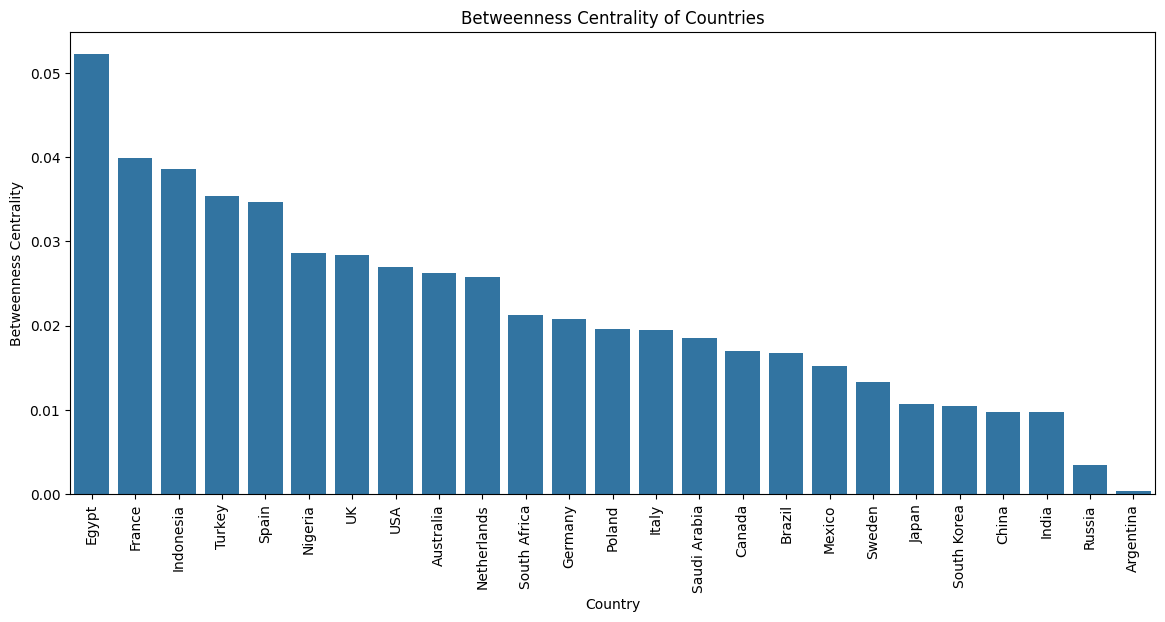

In [24]:
# Step 8: Centrality Measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame for visualization
centrality_df = pd.DataFrame({
    'Country': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values())
})

# Visualize centrality measures
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(x='Country', y='Degree Centrality', data=centrality_df.sort_values(by='Degree Centrality', ascending=False))
plt.xticks(rotation=90)
plt.title("Degree Centrality of Countries")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Country', y='Closeness Centrality', data=centrality_df.sort_values(by='Closeness Centrality', ascending=False))
plt.xticks(rotation=90)
plt.title("Closeness Centrality of Countries")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Country', y='Betweenness Centrality', data=centrality_df.sort_values(by='Betweenness Centrality', ascending=False))
plt.xticks(rotation=90)
plt.title("Betweenness Centrality of Countries")
plt.show()

# Insights from the Graph Analysis

# Degree Centrality of Countries:

It’s clear from the first chart that countries like the USA, UK, and Germany are highly connected within the network, as they have the highest degree centrality scores. This tells us that these countries have many direct links to others, making them important players in terms of relationships.
On the flip side, some countries, such as Angola, have much lower scores, indicating fewer direct connections. This could mean they have a smaller network or are more isolated.
Closeness Centrality of Countries:

The second chart shows that the USA, UK, and Germany also score well in closeness centrality, which makes sense because they can reach other countries quickly and efficiently. This essentially means these countries are well-positioned to spread information or influence rapidly through the network.
For countries with lower closeness scores, it might take more steps to reach others, suggesting they are not as centrally located within the network structure.
Betweenness Centrality of Countries:

The third chart highlights the USA as having the highest betweenness centrality, showing that it acts as a bridge connecting other countries. This suggests that the USA plays a key role in facilitating communication or interactions between countries that might not be directly connected.
Other countries, like France and Belgium, have relatively lower betweenness centrality, which indicates that while they are part of the network, they don’t hold as much power in connecting different groups or influencing the flow of information.

# Key Takeaways
The overall analysis makes it pretty clear that countries like the USA, UK, and Germany are crucial in this network for various reasons:

###### Degree Centrality highlights their direct connections.
###### Closeness Centrality emphasizes their efficiency in reaching others.
###### Betweenness Centrality points to their role as intermediaries or bridges within the network.